# Solutions
## Import modules

In [1]:
import pandas as pd

# Import other useful modules
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

Load the correct dataset we saved in the main notebook.

In [2]:
from pathlib import Path # A module for dealing with paths that is operating system agnostic
notebook_dir = Path.cwd() # Get the current working directory
base_dir = notebook_dir.parent.absolute() # Get the parent directory (folder that contains our working directory)
base_dir = base_dir.parent.absolute() # Get the parent directory (folder that contains our working directory)
data_dir = base_dir / 'data'# Get diretory where the data is stored
fname = data_dir / 'ship_ctd_short_clean.csv'

In [3]:
ctd_data = pd.read_csv(fname)

Create noisy data:

In [4]:
noisy_data = ctd_data['Temperature_C']

# Randomise data to make it super noisy
noisy_data = noisy_data * 2*np.random.rand(len(noisy_data)) + noisy_data**2
print(noisy_data)

0       295.271422
1       295.736021
2       288.914586
3       303.676876
4       274.030007
           ...    
1175    154.432938
1176    152.667927
1177    140.370441
1178    147.251754
1179    148.425409
Name: Temperature_C, Length: 1180, dtype: float64


Apply different rolling window types:

In [5]:
noisy_roll_default = noisy_data.rolling(window=50).mean()
noisy_roll_traing = noisy_data.rolling(window=50, win_type="triang").mean()
noisy_roll_gaussian = noisy_data.rolling(window=50, win_type="gaussian").mean(std=np.std(noisy_data))

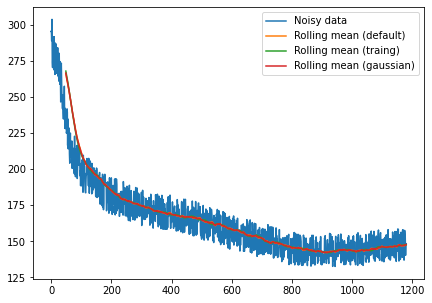

In [6]:
plt.figure(figsize=(7,5))
noisy_data.plot(label="Noisy data")
noisy_roll_default.plot(label="Rolling mean (default)")
noisy_roll_traing.plot(label="Rolling mean (traing)")
noisy_roll_gaussian.plot(label="Rolling mean (gaussian)")
plt.legend(loc="best")
plt.show()